In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from matplotlib import pyplot as plt

data = pd.read_csv(r'C:\Users\Logan Clark\Documents\Fantasy Stuff\Football Data\pahowdy_cfb_qb_training.csv')
rookie_data = pd.read_csv (r'C:\Users\Logan Clark\Documents\Fantasy Stuff\Football Data\pahowdy_cfb_qb_rookies.csv', encoding='latin-1')

print(data)
print(rookie_data)

                 Name              cfb_id    pfr_id               School  \
0         Vince Young       vince-young-1  YounVi00                Texas   
1          Colt McCoy        colt-mccoy-1  McCoCo00                Texas   
2       Jordan Palmer     jordan-palmer-1  PalmJo20        Texas-El Paso   
3     Alex Hornibrook   alex-hornibrook-1         0        Florida State   
4        Matt Barkley      matt-barkley-1  BarkMa00  Southern California   
..                ...                 ...       ...                  ...   
306    Matt Gutierrez    matt-gutierrez-1  GutiMa00             Michigan   
307      Ingle Martin      ingle-martin-1  MartIn00              Florida   
308  Tarvaris Jackson  tarvaris-jackson-1  JackTa00             Arkansas   
309       Matt Cassel       matt-cassel-1  CassMa00  Southern California   
310         Andy Hall         andy-hall-1  HallAn00         Georgia Tech   

         Conference  DR   DP  Draft Year  Last year designation  \
0    Big 12 (South) 

In [12]:
y = data.iloc[:, 45].to_numpy()

print(len(y))

for i in range(len(y)):
    if y[i] > 20:
        for x in range(3):
            data = data.append(data.iloc[i])
            #npData = np.vstack([npData, npData[i]])
            y = np.append(y, y[i])


print(len(y))

311
563


(array([162.,  34.,  55.,  92.,  72.,  64.,  40.,  28.,  12.,   4.]),
 array([ 0.   ,  7.001, 14.002, 21.003, 28.004, 35.005, 42.006, 49.007,
        56.008, 63.009, 70.01 ]),
 <BarContainer object of 10 artists>)

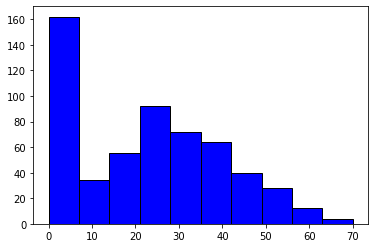

In [13]:
plt.hist(y, color = 'blue', edgecolor = 'black',
         bins = 10)

In [14]:
cols = list(data.columns)
cols_rookie = list(rookie_data.columns)

names1 = list(rookie_data.iloc[:, 0])

#print(names)

remove = list()
remove.append(cols[20])
remove.append(cols[26])
remove_rookie = list()
remove_rookie.append(cols[20])
remove_rookie.append(cols[26])



for i in range(len(cols)):
    if (i > 39 or i<5):
        remove.append(cols[i])
    
for i in range(len(cols_rookie)):
    if (i<5):
        remove_rookie.append(cols_rookie[i])

print(remove)
print(remove_rookie)
    
x = data.drop(columns=remove)

x_rookie = rookie_data.drop(columns=remove_rookie)

# x = x.drop(columns=['Last.7', 'Best.7'])

# x_rookie = x_rookie.drop(columns=['Last.7', 'Best.7'])

labels = list(x.columns)

labels_rookie = list(x_rookie.columns)

# print(labels)
# print(labels_rookie)

['COMP% (Last Year)', 'AVG PassRat', 'Name', 'cfb_id', 'pfr_id', 'School', 'Conference', '# of top 5  finishes', '# of top  12 finishes', '# of top  24 finishes', 'AVG EP Season 1-3', 'AVG PPG (PPR) Season 1-3', 'Score']
['COMP% (Last Year)', 'AVG PassRat', 'Name', 'cfb_id', 'pfr_id', 'School', 'Conference']


In [15]:
names = ["linReg", "ridgeReg", "lassoReg", "dtReg", "rfReg", "knReg3", "knReg5", "knReg7", "knReg9", "svrReg"]

namesDict = dict()

for i in names:
    namesDict[i] = 0
    
#print(namesDict)

for i in range(1):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

    linReg = LinearRegression().fit(X_train, y_train)
    namesDict["linReg"] = namesDict["linReg"] + linReg.score(X_test, y_test)

    ridgeReg = Ridge().fit(X_train, y_train)
    namesDict["ridgeReg"] = namesDict["ridgeReg"] + ridgeReg.score(X_test, y_test)

    lassoReg = Lasso().fit(X_train, y_train)
    namesDict["lassoReg"] = namesDict["lassoReg"] + lassoReg.score(X_test, y_test)

    dtReg = DecisionTreeRegressor().fit(X_train, y_train)
    namesDict["dtReg"] = namesDict["dtReg"] + dtReg.score(X_test, y_test)

    rfReg = RandomForestRegressor().fit(X_train, y_train)
    namesDict["rfReg"] = namesDict["rfReg"] + rfReg.score(X_test, y_test)

    knReg3 = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)
    namesDict["knReg3"] = namesDict["knReg3"] + knReg3.score(X_test, y_test)

    knReg5 = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
    namesDict["knReg5"] = namesDict["knReg5"] + knReg5.score(X_test, y_test)

    knReg7 = KNeighborsRegressor(n_neighbors=7).fit(X_train, y_train)
    namesDict["knReg7"] = namesDict["knReg7"] + knReg7.score(X_test, y_test)

    knReg9 = KNeighborsRegressor(n_neighbors=9).fit(X_train, y_train)
    namesDict["knReg9"] = namesDict["knReg9"] + knReg9.score(X_test, y_test)

    svrReg = SVR().fit(X_train, y_train)
    namesDict["svrReg"] = namesDict["svrReg"] + svrReg.score(X_test, y_test)

for i in namesDict:
    print(i + ": " + str(namesDict[i]/100))

linReg: 0.006053575394356652
ridgeReg: 0.006173301824948137
lassoReg: 0.00616097621309273
dtReg: 0.006837653029435365
rfReg: 0.008576130912536355
knReg3: 0.007532734387882252
knReg5: 0.005045821135109698
knReg7: 0.0034794593050409914
knReg9: 0.002924059038383484
svrReg: -0.0008624480901799148


DR
Feature: 0, Score: 6.56764
DP
Feature: 1, Score: -0.27679
Draft Year
Feature: 2, Score: -0.12920
Last year designation
Feature: 3, Score: 3.35886
Age IN DRAFT YEAR
Feature: 4, Score: -2.86382
Conference Drafted Rate
Feature: 5, Score: 7.33700
Conference Hit Rate
Feature: 6, Score: 15.59068
Age Draft Hit Rate AVG
Feature: 7, Score: 11.84765
Rush ATT/Game
Feature: 8, Score: -0.21691
Pass Attempts
Feature: 9, Score: -0.01097
Completions
Feature: 10, Score: 0.01489
Comp %
Feature: 11, Score: -3.59607
All Yards
Feature: 12, Score: 0.00130
Years played
Feature: 13, Score: -2.98303
G
Feature: 14, Score: -0.08511
Pass Yard Per Game (Last)
Feature: 15, Score: 0.58583
QB AVG YP(PassA)
Feature: 16, Score: -0.21096
QB AVG AY/A
Feature: 17, Score: -0.63527
CPOE* (*hacked versions - adjusted by PaYds/G instead of aDot- COMP% over expected using conference AVG since 2003)
Feature: 18, Score: 4.06450
Comp AVG
Feature: 19, Score: -0.23511
AVG TANYA
Feature: 20, Score: -0.83050
BMI
Feature: 21, Score

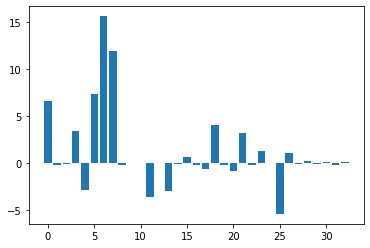

In [16]:
importance = ridgeReg.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print(labels[i])
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [17]:
rfReg.predict(x_rookie)

array([12.3781, 39.4993, 36.9118, 30.9149,  4.2762, 34.2334, 17.1933,
        0.9455, 12.7373, 16.6507, 14.5204,  0.6871,  2.594 ])

In [18]:
predictions = list(rfReg.predict(x_rookie))

tempDict = dict()

for i in range(len(predictions)):
     tempDict[names1[i]] = predictions[i]   
        
new = sorted(tempDict.items(), key=lambda x: x[1], reverse=True)

for i in new:
    print(i)

('Trevor Lawrence', 39.49929999999999)
('Zach Wilson', 36.91179999999999)
('Mac Jones', 34.23339999999999)
('Justin Fields', 30.91490000000001)
('Ian Book', 17.193299999999994)
('Kyle Trask', 16.650700000000008)
('Davis Mills', 14.520399999999997)
('Sam Ehlinger', 12.7373)
('Kellen Mond', 12.378100000000003)
('Jamie Newman', 4.276200000000002)
('K.J. Costello', 2.594)
('Shane Buechele', 0.9454999999999998)
('Peyton Ramsey', 0.6870999999999999)


In [19]:
tempDict = dict()

for i in names1:
    tempDict[i] = 0


for i in range(100):
    realRfReg = RandomForestRegressor().fit(x, y)

    predictions = list(realRfReg.predict(x_rookie))

    for i in range(len(predictions)):
         tempDict[names1[i]] = tempDict[names1[i]] + predictions[i]   

new = sorted(tempDict.items(), key=lambda x: x[1], reverse=True)

for i in new:
    print(i)



('Trevor Lawrence', 4058.5201000000006)
('Zach Wilson', 3707.9978999999994)
('Justin Fields', 3289.7489000000014)
('Mac Jones', 2921.440499999999)
('Ian Book', 1822.5256000000006)
('Kyle Trask', 1679.1486000000007)
('Kellen Mond', 1514.1226000000008)
('Davis Mills', 1495.7438000000009)
('Sam Ehlinger', 1146.3980000000006)
('Jamie Newman', 449.719)
('K.J. Costello', 175.86289999999997)
('Shane Buechele', 85.58959999999999)
('Peyton Ramsey', 7.264300000000002)
